# This notebook is dedicated to the plotting of the different results

In [48]:
import numpy                as np
import matplotlib.pyplot    as plt
import pandas as pd
import seaborn              as sns
import pickle
from scipy.stats import norm
import itertools
from matplotlib.pyplot import figure
from utils_plot_errors import *
from utils_calib import *

In [49]:
design_number = 1 #indicates which design $x_j$ to work with
sigma = [0.9,0.9,0.3]
suff = "" #suffix for potential smallnoise study
results_measures = pd.read_csv(f"measurement_points/results_measures_design_{design_number}" + suff + ".csv", index_col=0)
true_values = results_measures.iloc[:10,:] #get true values
results_measures = results_measures.iloc[10:,:] #get noisy observations

pre_path = f"design_{design_number}" + suff + "/"


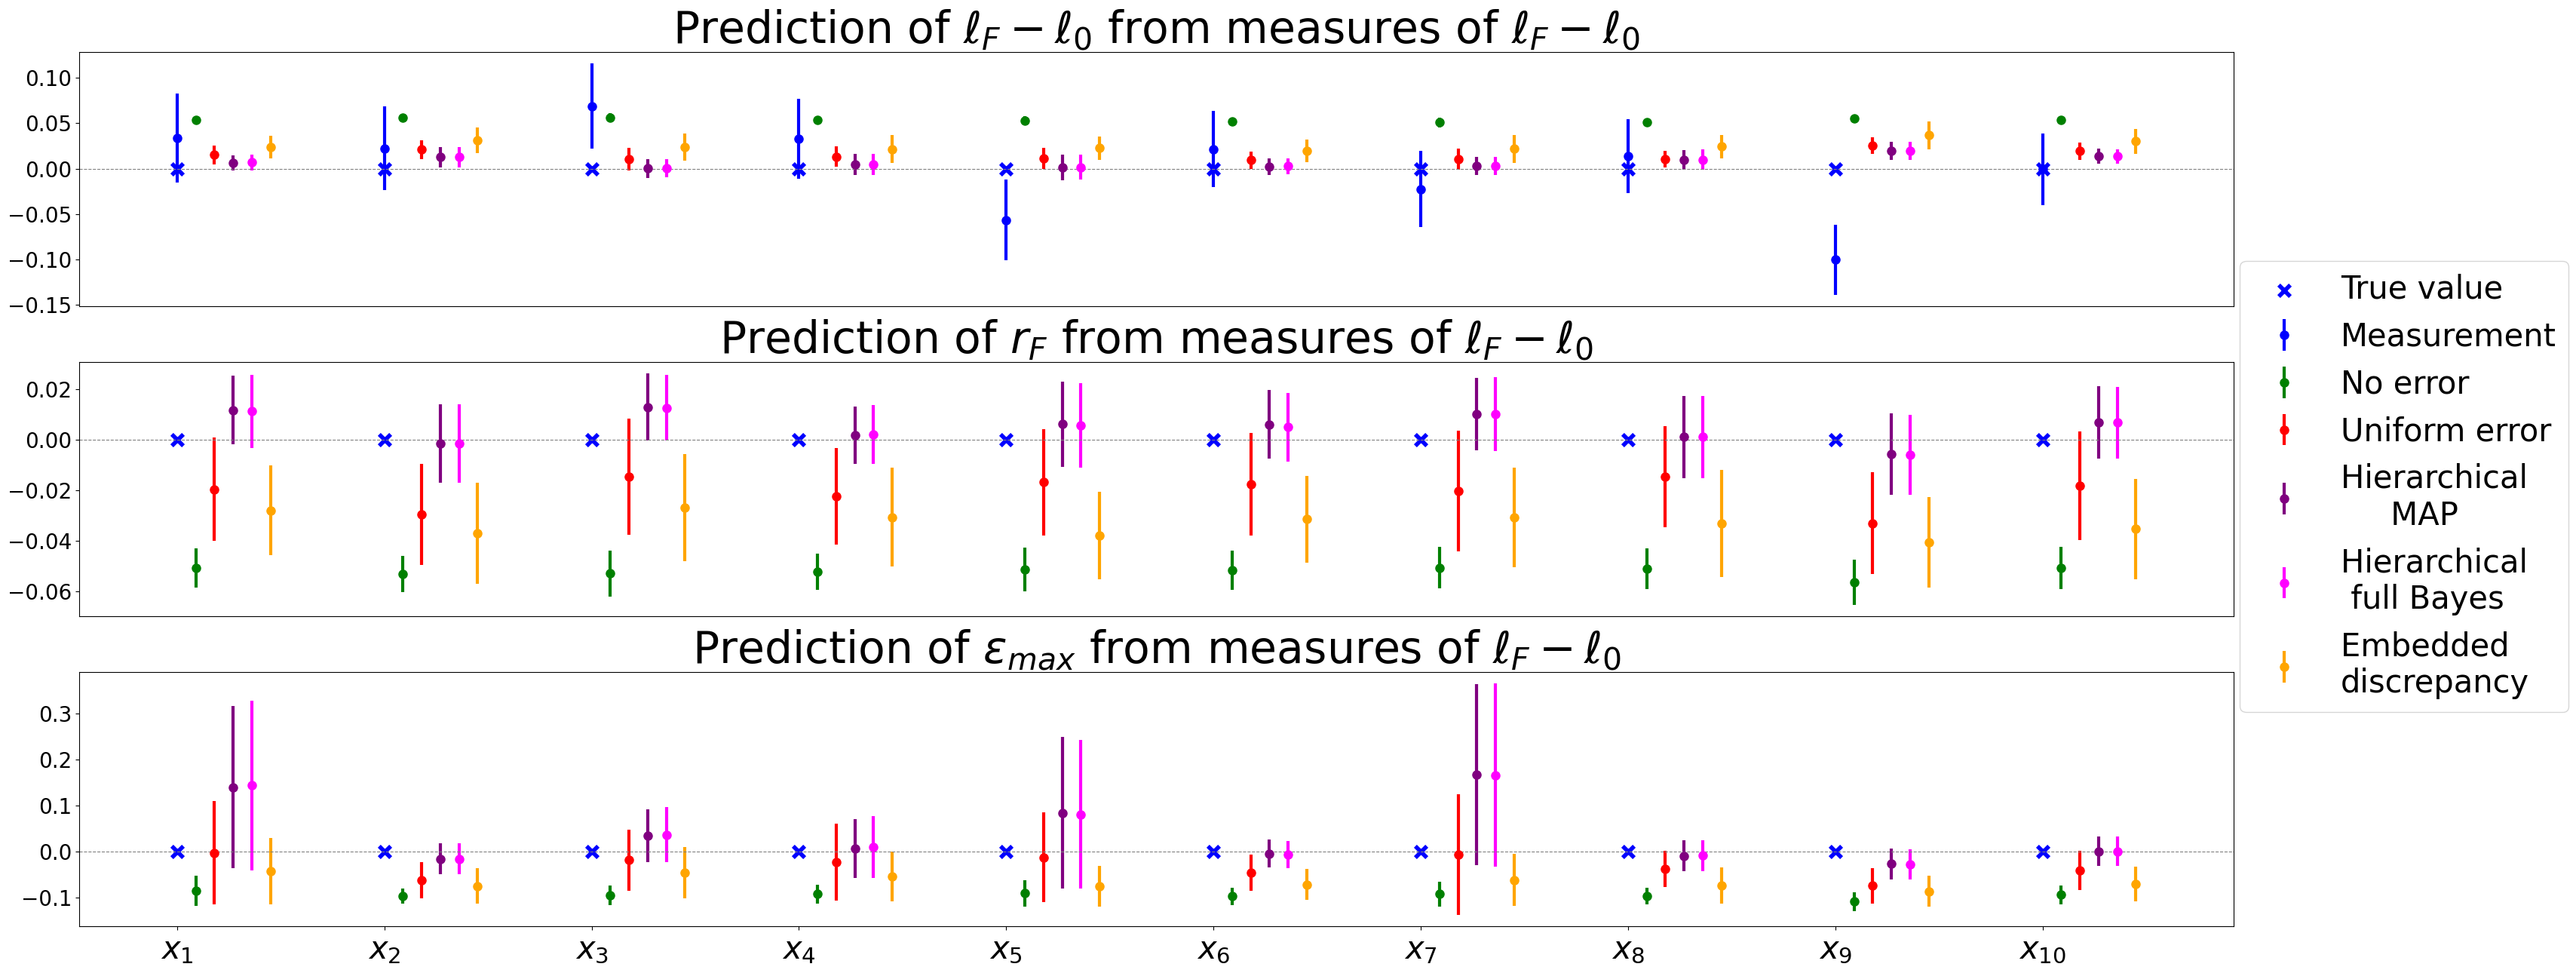

In [50]:
plot_mean_std(index_calib = 1, results_measures = results_measures, true_values = true_values, sigma = sigma, pre_path = pre_path, no_error = True, unif_error = True, hierarchical_map = True, full_bayes = True, embed = True, savefig = True) 

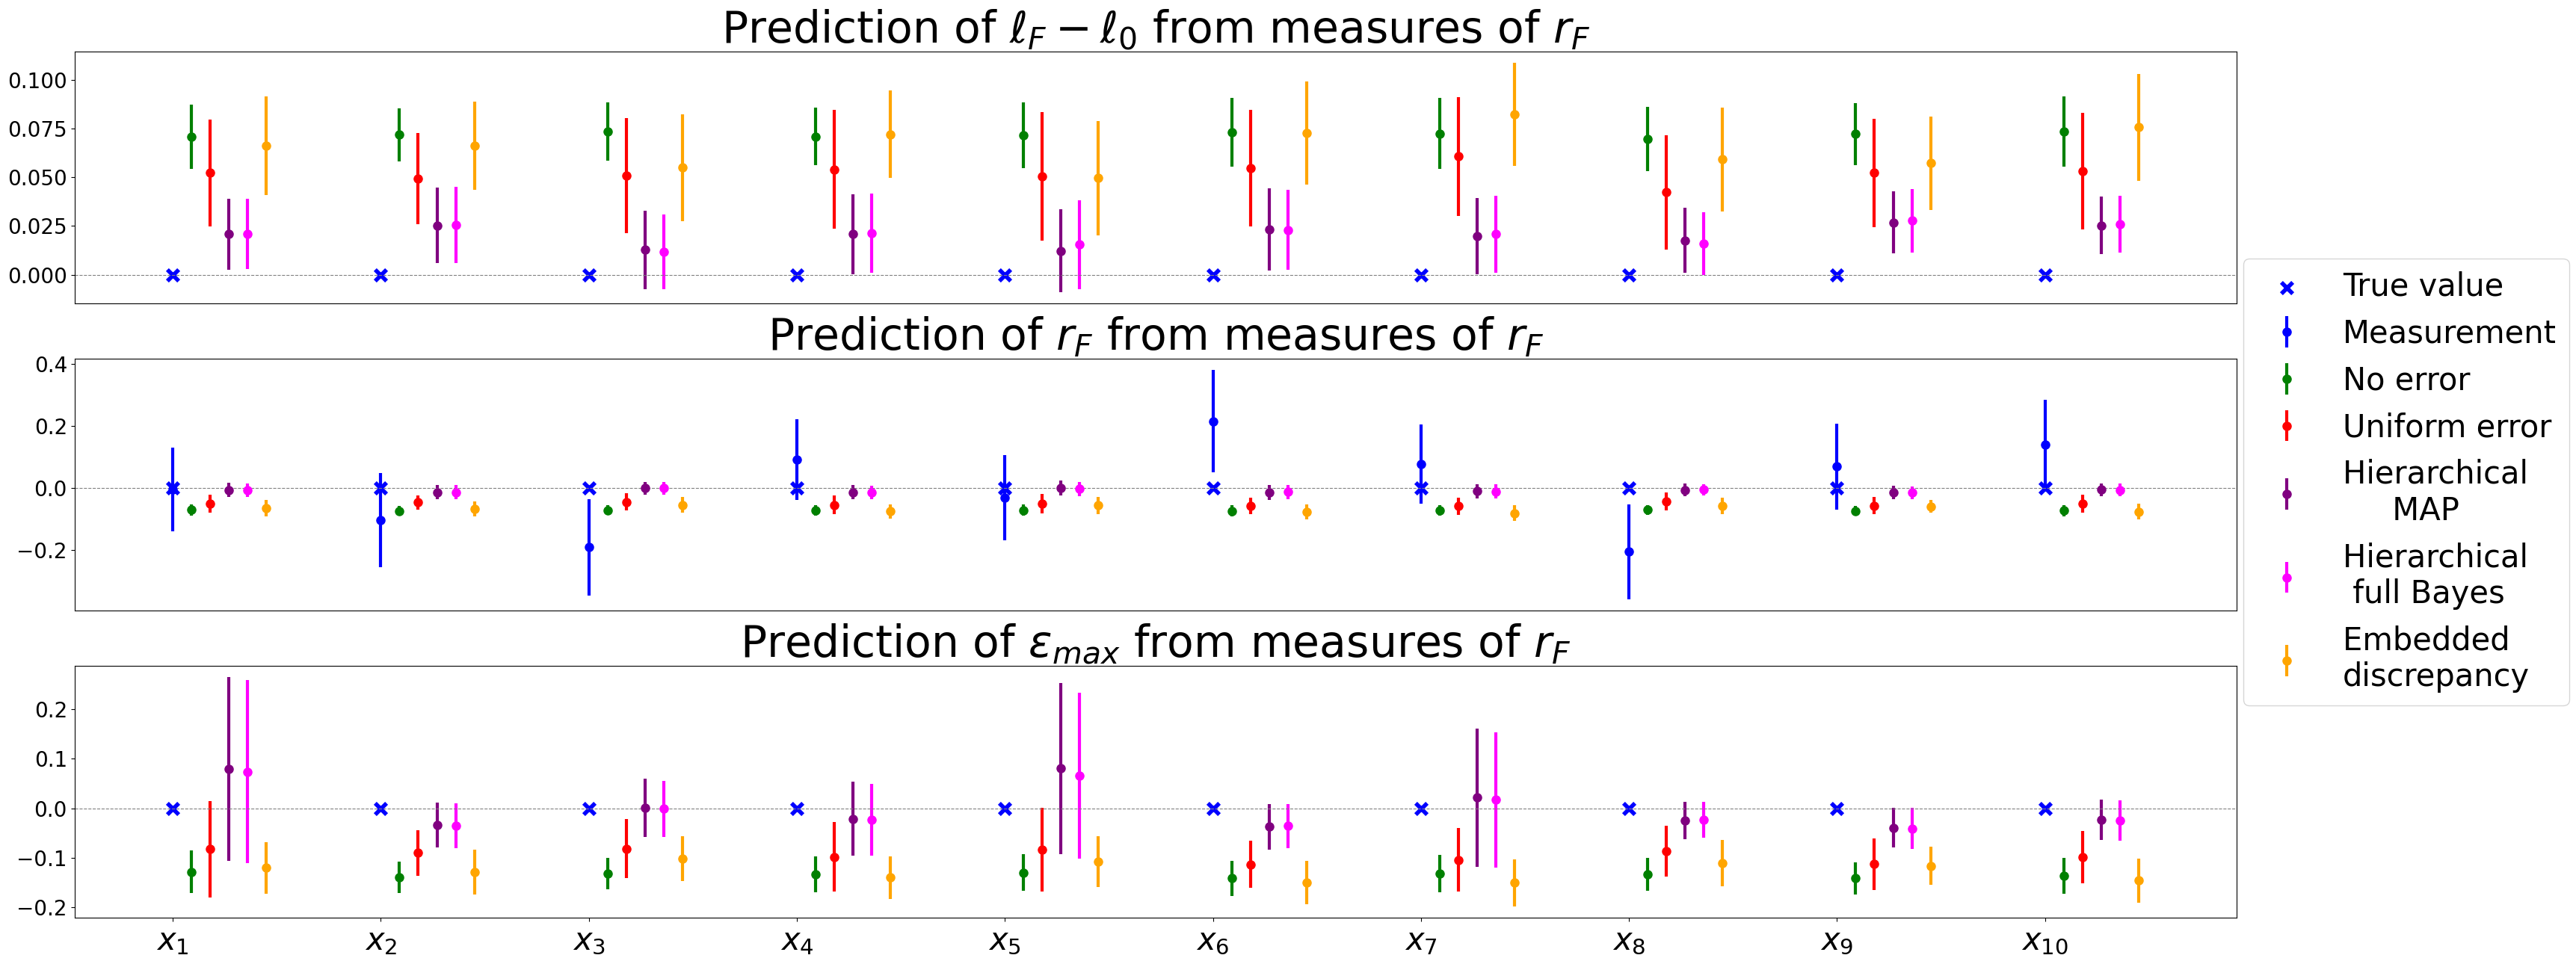

In [51]:
plot_mean_std(index_calib = 2, results_measures = results_measures, true_values = true_values, sigma = sigma, pre_path = pre_path, no_error = True, unif_error = True, hierarchical_map = True, full_bayes = True, embed = True, savefig = True) 

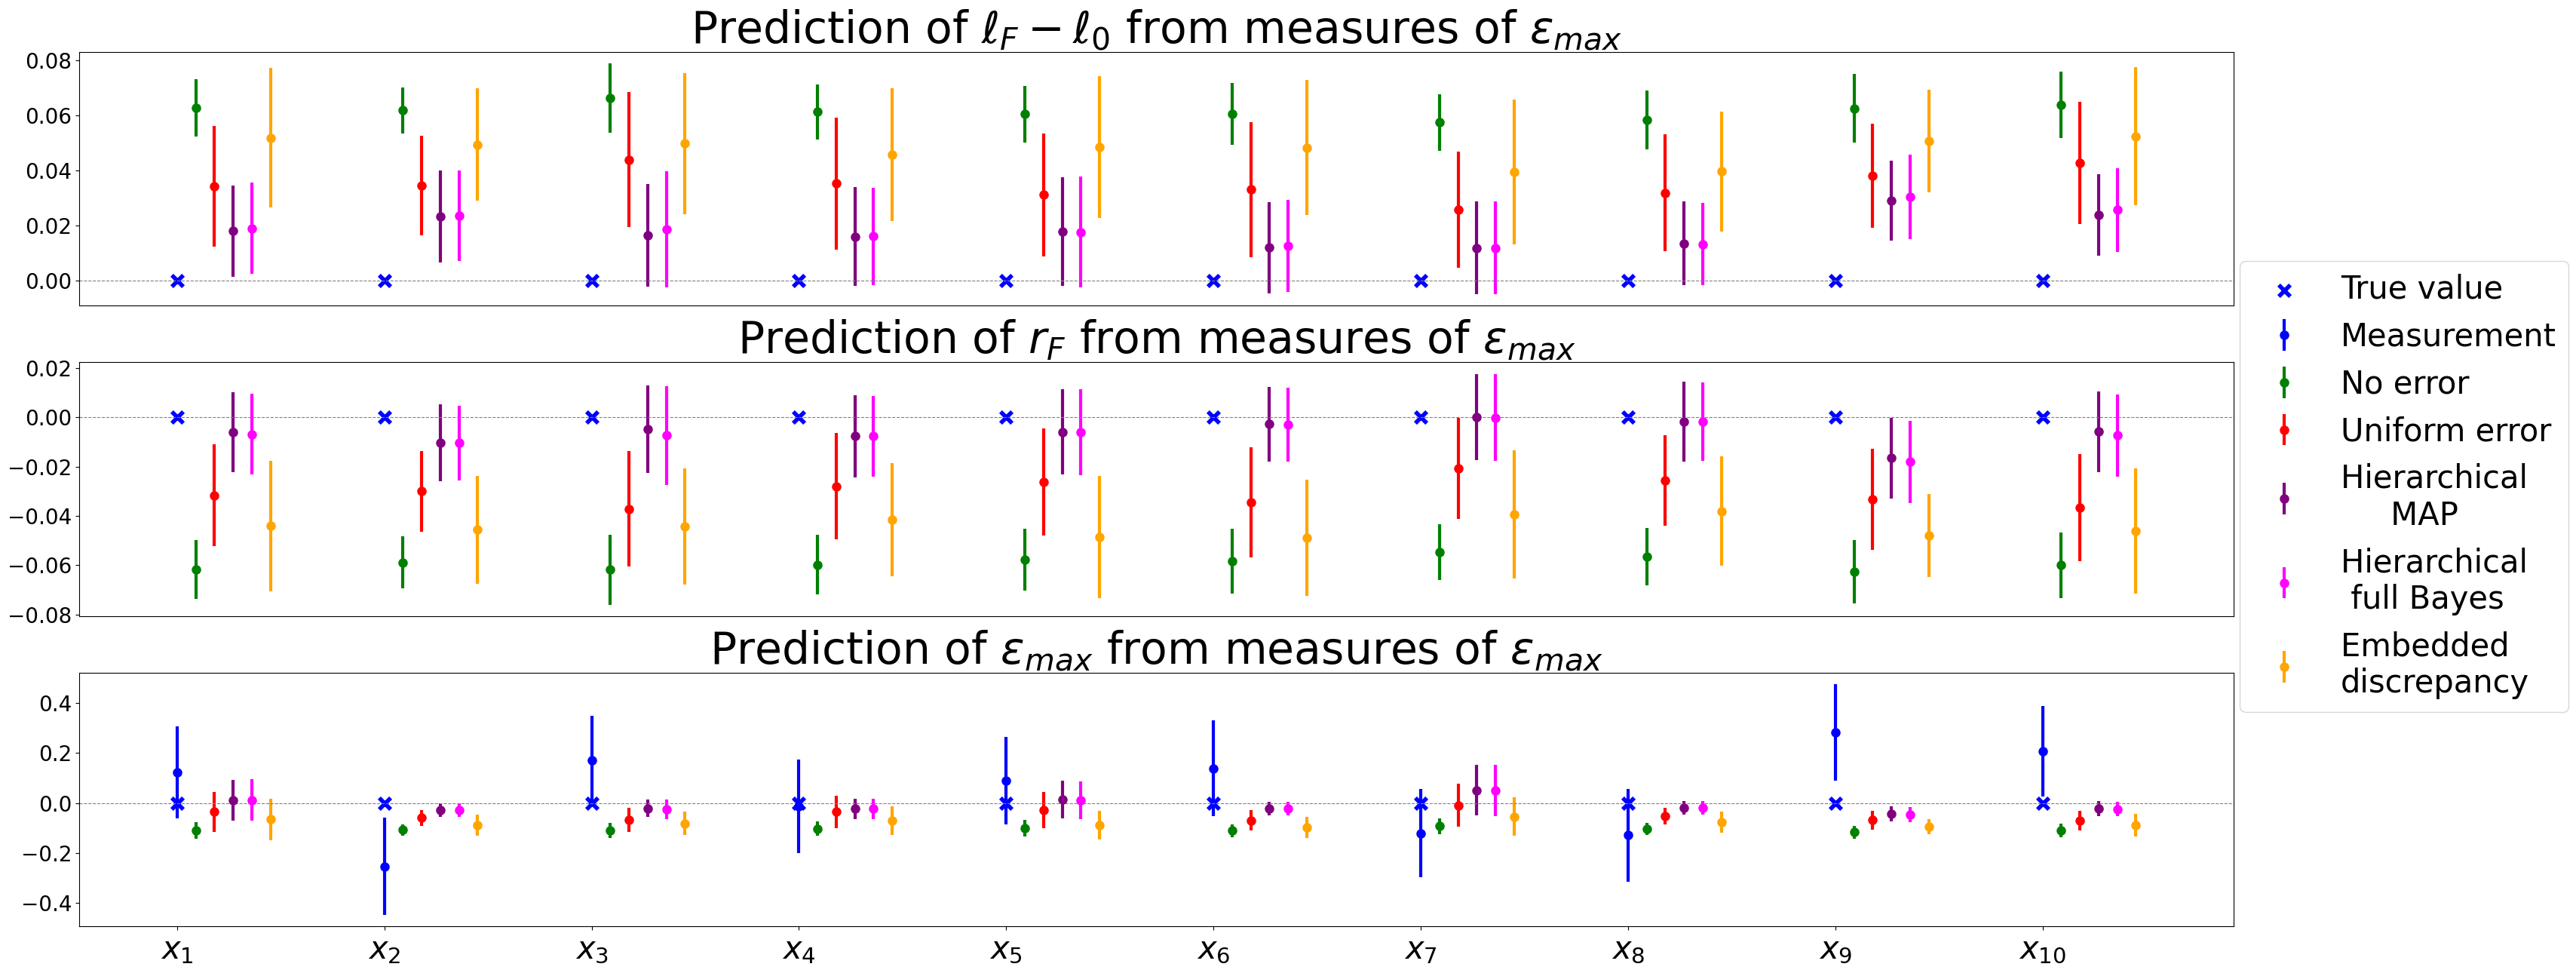

In [52]:
plot_mean_std(index_calib = 3, results_measures = results_measures, true_values = true_values, sigma = sigma, pre_path = pre_path, no_error = True, unif_error = True, hierarchical_map = True, full_bayes = True, embed = True, savefig = True) 

## We display the performance scores for each method

In [53]:
get_table_score(1,pre_path, true_values, savefig = True)

,No error,Uniform error,Hierarchical MAP,Hierarchical full Bayes,Embedded discrepancy
0,-1642.06,6.21,21.40,21.12,-9.88
1,-360.11,29.66,45.14,45.29,11.10
2,-137.73,36.52,43.16,42.89,24.41


In [54]:
get_table_score(2,pre_path, true_values, savefig = True)

,No error,Uniform error,Hierarchical MAP,Hierarchical full Bayes,Embedded discrepancy
0,-178.16,-22.41,5.13,4.67,-55.48
1,-136.48,1.58,37.85,37.89,-39.31
2,-92.16,17.78,40.34,40.68,-29.10


In [55]:
get_table_score(3,pre_path, true_values, savefig = True)

,No error,Uniform error,Hierarchical MAP,Hierarchical full Bayes,Embedded discrepancy
0,-305.05,-10.95,7.14,6.39,-28.00
1,-182.21,18.66,43.19,42.63,-0.27
2,-92.57,31.77,48.00,47.45,15.53


# Below is the plot of an example of posterior sample obtained for $\Lambda$ 

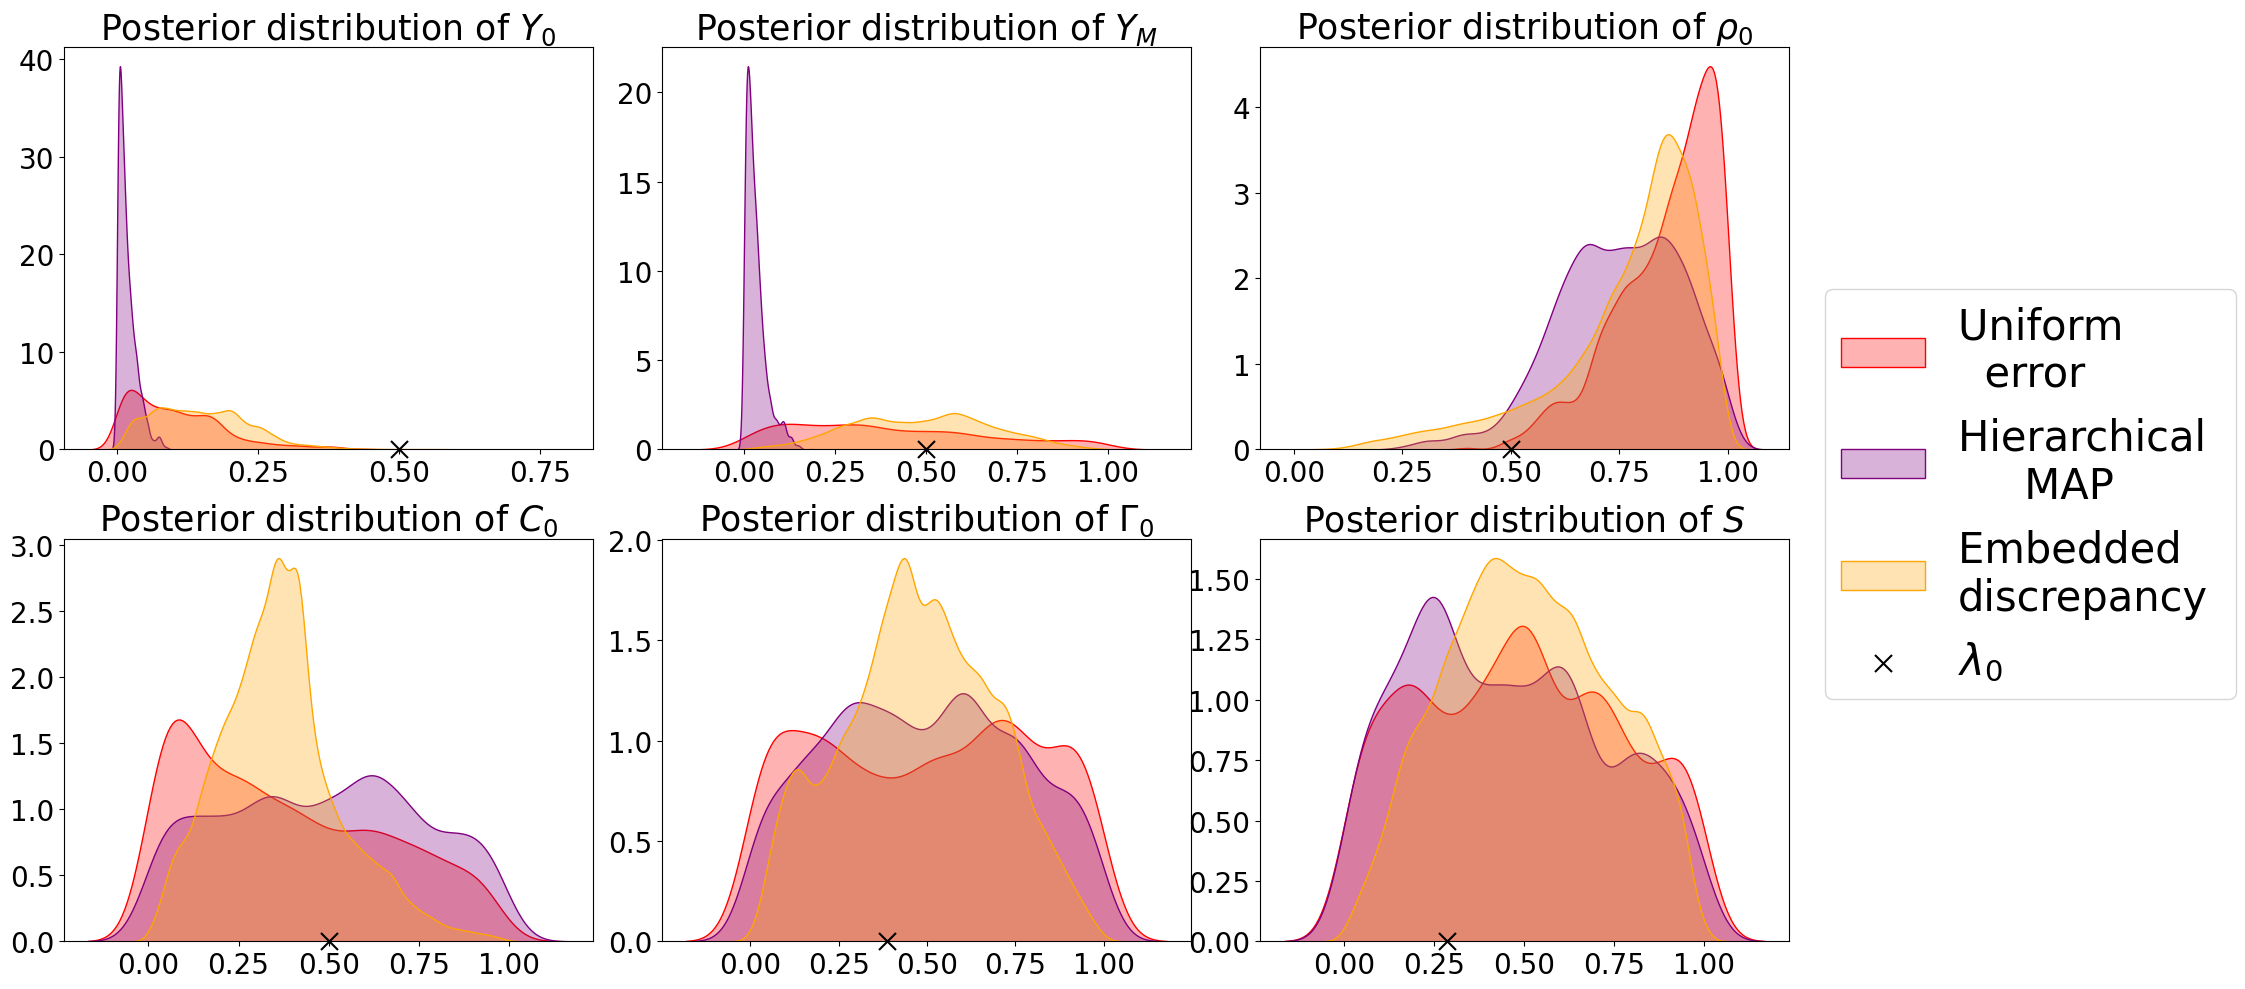

In [33]:
params = [r'$Y_0$', r'$Y_M$',r'$\rho_0$', r'$C_0$', r'$\Gamma_0$', r'$S$'] #variable names
bMINlambda = np.array([330, 70,  8000, 3000, 0.1, 0.1]) #lower bounds
bMAXlambda = np.array([470, 150, 10000, 5000, 5, 5.0]) #upper bounds

lambda_0 = (np.array([400,110,9000,4000,2,1.5])-bMINlambda)/(bMAXlambda-bMINlambda) #lambda0 used for the measures

index_calib=1 #which calibration variable
idx_loo = 9 #which observation point x_j

sample_unif = pd.read_csv(pre_path + f"uniform_error/calib_{index_calib}/lambd_post_{idx_loo}.csv", index_col = 0).values #uniform error sample
sample_hier = pd.read_csv(pre_path + f"hierarchical_model/calib_{index_calib}/lambd_post_{idx_loo}.csv", index_col = 0).values #hierarchical model sample
sample_embed = pd.read_csv(pre_path + f"embedded_discrepancy/calib_{index_calib}/lambd_post_{idx_loo}.csv", index_col = 0).values #embedded discrepancy sample
sample_unif = np.apply_along_axis(lambda x:(x-bMINlambda)/(bMAXlambda-bMINlambda), 1, sample_unif) #normalized sample
sample_hier = np.apply_along_axis(lambda x:(x-bMINlambda)/(bMAXlambda-bMINlambda), 1, sample_hier) #normalized sample


r = 30
unifo = np.linspace(0,1,r)*2-1 #uniform sample in 1D for \xi
unifo = np.concatenate([unifo]*len(sample_embed)) 
sample_embed = np.repeat(sample_embed, r, axis = 0) 
sample_embed = sample_embed[:,:6]+np.apply_along_axis(lambda x: x*unifo, 0, sample_embed[:,6:]) #lambda^1 + lambda^2 \xi on each marginal


fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Tracer les KDE pour chaque colonne
for i in range(6):
    kde_unif = sns.kdeplot(sample_unif[:, i], ax=axes[i], label='Uniform \n  error', color='red', fill=True, alpha=0.3)
    kde_hier = sns.kdeplot(sample_hier[:, i], ax=axes[i], label='Hierarchical \n     MAP', color='purple', fill=True, alpha=0.3)
    kde_embed = sns.kdeplot(sample_embed[:, i], ax=axes[i], label='Embedded \ndiscrepancy', color='orange', fill=True, alpha=0.3)
    
    
    axes[i].set_xticks([0, 0.25, 0.5, 0.75, 1])
    axes[i].set_title(f'Posterior distribution of {params[i]}', fontsize=25)
    axes[i].tick_params(axis='both', labelsize=20)
    axes[i].set_ylabel('')  # Supprimer le titre de l'axe Y
    axes[i].scatter(lambda_0[i], 0, color='black', marker='x', s=150, label=r'$\lambda_0$',clip_on=False)

# Créer une légende globale
handles, labels = axes[3].get_legend_handles_labels()  # Récupérer les objets courbes et les labels d'un subplot

# Ajouter la légende globale à droite
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=30)

# Ajuster l'espacement des subplots
plt.tight_layout()

plt.savefig(pre_path + f"plots/compare_samples.jpg",bbox_inches='tight', format = "jpg")

# Afficher la figure
plt.show()

# Below is the code to plot the estimated posterior distribution of $\boldsymbol{A}$, and the lower bound on the confidence level $\gamma(\boldsymbol{\alpha})$ associated with $p(\boldsymbol{\alpha} \mid \boldsymbol{y_{1,\text{obs}}}) \leq \beta p(\boldsymbol{\alpha}^{\star}_\ell \mid \boldsymbol{y_{1,\text{obs}}})$

In [12]:
bMINlambda = np.array([330, 70,  8000, 3000, 0.1, 0.1]) #lower bounds
bMAXlambda = np.array([470, 150, 10000, 5000, 5, 5.0]) #upper bounds

index_lambda_p = [2,3,4,5] #indexes of the four physical parameters
index_lambda_q = [0,1] #indexes of the two numerical parameters
scale = 0.45 #std deviation of the truncated gaussian prior

with open(f'surrogate_models/mm_list_seed_x{seed_x}.pkl', 'rb') as f:
    mm_list = pickle.load(f) #get metamodel hyperparameters

index_calib = 3 #index of the calibration variable
alpha_map_list = pd.read_csv(pre_path + f"hierarchical_model/calib_{index_calib}/alpha_df.csv", index_col = 0).values #get the estimated alpha_maps
idx_loo = 5 #observation point
alpha_star = alpha_map_list[idx_loo] #estimated alpha_map

M = 20000#size of the sample to get the confidence interval
alpha_min = -10
alpha_max = 10
delta_alpha = 4

np.random.seed(123456)
df_Lambda = sample_Lambda(alpha = alpha_star, M = M, index_lambda_p = index_lambda_p, index_lambda_q = index_lambda_q, scale = scale, bMINlambda = bMINlambda, bMAXlambda = bMAXlambda) #sample lambda from p(lambda given alpha_map)
Ysimu_list, Ystd_list, stored_likelihoods = get_likelihoods_dflambda(df_Lambda = df_Lambda.values, sigma = sigma, results_measures = results_measures, mm_list = mm_list, index=[index_calib], std_code = True, idx_loo = idx_loo) #get the likelihoods

size = 10 #size of the grid 
beta = 1.05 #margin coefficient

bounds = [(max(alpha_star[ii] - delta_alpha,alpha_min), min(alpha_max, alpha_star[ii]+delta_alpha)) for ii in range(len(alpha_star))] #bounds of the grid

alpha_grid = np.array(list(itertools.product(np.linspace(bounds[0][0],bounds[0][1],size), np.linspace(bounds[1][0],bounds[1][1],size))))

p_alphastar = p_lambda_df(df_Lambda = df_Lambda, alpha = alpha_star, index_lambda_p = index_lambda_p, index_lambda_q = index_lambda_q, scale = scale, bMINlambda = bMINlambda, bMAXlambda = bMAXlambda) #prior coefficient p(lambda_k | alpha_map)
ratios_dic = {} #compute the importance sampling ratios for every alpha in the grid
for ii in range(len(alpha_grid)):
    alpha = alpha_grid[ii]
    ratios_dic[str(alpha)] = np.array(p_lambda_df(df_Lambda = df_Lambda, alpha = np.array(alpha), index_lambda_p = index_lambda_p, index_lambda_q = index_lambda_q, scale = scale,  bMINlambda = bMINlambda, bMAXlambda = bMAXlambda)/p_alphastar).reshape(len(p_alphastar),1)
    
is_terms = np.concatenate([stored_likelihoods*ratios_dic[str(alpha)] for alpha in alpha_grid], axis=1) #likelihood times is ratios (p(yobs | lambda_k) p(lambda_k | alpha)/p(lambda_k | alpha_star)
is_terms_diff = is_terms - beta*stored_likelihoods #(p(yobs | lambda_k) (p(lambda_k | alpha)/p(lambda_k | alpha_star) - \beta)
likeli_grid_true = np.mean(is_terms, axis=0) #the estimator of the likelihood is the mean of is_terms
mu_alpha = np.mean(is_terms_diff, axis = 0)
std_alpha = np.std(is_terms_diff, axis=0)

def bootstrap_distrib(data, fun, n_resamples, seed = None):
    np.random.seed(seed)
    res = np.array([fun(data[np.random.choice(len(data),len(data), replace=True)]) for ii in range(n_resamples)])
    return res

def statistic_for_bootstrap(data, idx):
    mean = np.mean(data)
    std = np.std(data)
    m3 = np.mean(abs(data-mean)**3)
    return norm.cdf(np.sqrt(M)*(-likeli_grid_diff[idx])/std) - .4785*m3/std**3/np.sqrt(M)

confidence = norm.cdf(np.sqrt(M)*(-mu_alpha)/std_alpha)


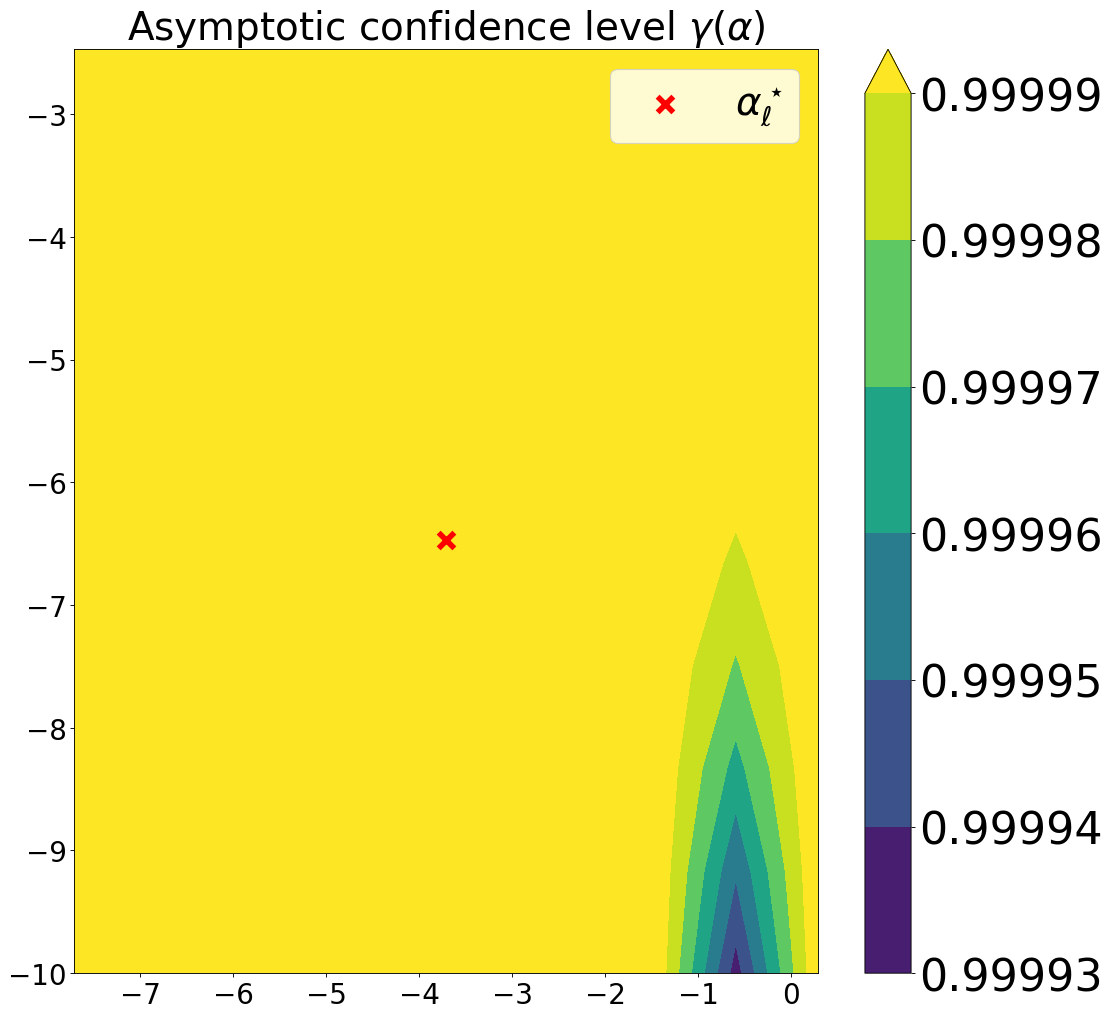

In [13]:
from matplotlib.ticker import ScalarFormatter

figure(figsize=(15, 15), dpi=80) #plot the confidence level ac
contour = plt.contourf(np.linspace(bounds[0][0],bounds[0][1],10),np.linspace(bounds[1][0],bounds[1][1],10), np.transpose(confidence.reshape(10,10)), cmap='viridis',extend="max")
plt.scatter(alpha_star[0], alpha_star[1], marker='x', color='red', s=200, linewidths=5, label=r'$\alpha^\star_\ell$')
colorbar = plt.colorbar(contour, label='')
colorbar.ax.tick_params(labelsize=40)
colorbar.ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.title(r"Asymptotic confidence level $\gamma(\alpha)$", fontsize=35)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.legend(loc='upper right', fontsize=35)
plt.savefig(pre_path + f"plots/confidence_alpha.jpg",bbox_inches='tight', format = "jpg")
plt.show()

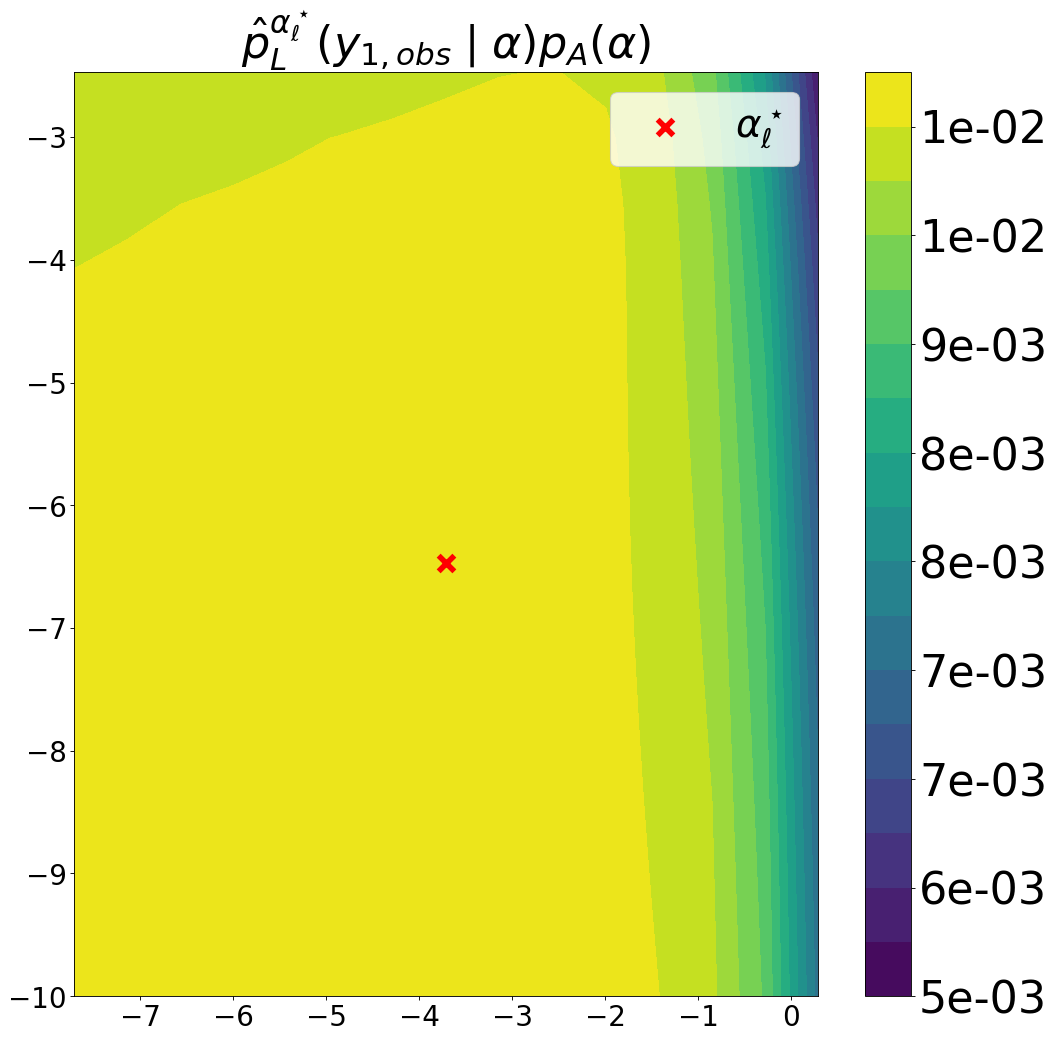

In [14]:
M = 10**4 #size of the sample to estimate the likelihood of A for the MCMC sampling
np.random.seed(123456)
df_Lambda = sample_Lambda(alpha = alpha_star, M = M, index_lambda_p = index_lambda_p, index_lambda_q = index_lambda_q, scale = scale, bMINlambda = bMINlambda, bMAXlambda = bMAXlambda) #sample lambda from p(lambda given alpha_map)
Ysimu_list, Ystd_list, stored_likelihoods = get_likelihoods_dflambda(df_Lambda = df_Lambda.values, sigma = sigma, results_measures = results_measures, mm_list = mm_list, index=[index_calib], std_code = True, idx_loo = idx_loo) #get the likelihoods

size = 15 #size of the grid 

bounds = [(max(alpha_star[ii] - delta_alpha,alpha_min), min(alpha_max, alpha_star[ii]+delta_alpha)) for ii in range(len(alpha_star))] #bounds of the grid
#bounds = [(-10,10) for ii in range(len(alpha_star))] #bounds of the grid

alpha_grid = np.array(list(itertools.product(np.linspace(bounds[0][0],bounds[0][1],size), np.linspace(bounds[1][0],bounds[1][1],size))))

p_alphastar = p_lambda_df(df_Lambda = df_Lambda, alpha = alpha_star, index_lambda_p = index_lambda_p, index_lambda_q = index_lambda_q, scale = scale,  bMINlambda = bMINlambda, bMAXlambda = bMAXlambda) #prior coefficient p(lambda_k | alpha_map)
ratios_dic = {} #compute the importance sampling ratios for every alpha in the grid
for ii in range(len(alpha_grid)):
    alpha = alpha_grid[ii]
    ratios_dic[str(alpha)] = np.array(p_lambda_df(df_Lambda = df_Lambda, alpha = np.array(alpha), index_lambda_p = index_lambda_p, index_lambda_q = index_lambda_q, scale = scale,  bMINlambda = bMINlambda, bMAXlambda = bMAXlambda)/p_alphastar).reshape(len(p_alphastar),1)
    
is_terms = np.concatenate([stored_likelihoods*ratios_dic[str(alpha)] for alpha in alpha_grid], axis=1) #likelihood times is ratios (p(yobs | lambda_k) p(lambda_k | alpha)/p(lambda_k | alpha_star)
likeli_grid_true = np.mean(is_terms, axis=0) #the estimator of the likelihood is the mean of is_terms

figure(figsize=(15, 15), dpi=80)
contour = plt.contourf(np.linspace(bounds[0][0],bounds[0][1],size),np.linspace(bounds[1][0],bounds[1][1],size), np.transpose(likeli_grid_true.reshape(size,size)), cmap='viridis', levels = 16)
plt.scatter(alpha_star[0], alpha_star[1], marker='x', color='red', s=200, linewidths=5, label=r'$\alpha^\star_\ell$')
colorbar = plt.colorbar(contour, label='',format='%.0e')
colorbar.ax.tick_params(labelsize=40)
plt.title(r"$\hat{p}^{\alpha^\star_{\ell}}_L(y_{1,obs} \mid \alpha)p_{A}(\alpha)$", fontsize=40)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.legend(loc='upper right', fontsize=35)
plt.savefig(pre_path + f"plots/likeli_alpha.jpg",bbox_inches='tight', format = "jpg")
plt.show()